In [2]:
import os
import pickle
import h5py
import pandas
import tempfile

import matplotlib


from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

import logomaker

Matplotlib is building the font cache; this may take a moment.


In [3]:
data_dir = '/lustre/groups/epigenereg01/workspace/projects/vale/MLM/motif_predictions/modisco/' 

In [4]:
def path_to_image_html(path):
    return '<img src="' + path + '" width="240" >' if path != "" else ""


def _plot_weights(array, path, figsize=(10, 3), **kwargs):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)

    df = pandas.DataFrame(array, columns=["A", "C", "G", "T"])
    df.index.name = "pos"

    crp_logo = logomaker.Logo(df, ax=ax)
    crp_logo.style_spines(visible=False)
    plt.ylim(min(df.sum(axis=1).min(), 0), df.sum(axis=1).max())

    if path is not None:
        matplotlib.use("pdf")
        plt.savefig(path)
        plt.close()
    else:
        % matplotlib inline
        plt.show()

In [5]:
def create_modisco_logos(modisco_file, modisco_logo_dir, trim_threshold):
    results = h5py.File(modisco_file, "r")
    tags = []

    for name in ["pos_patterns", "neg_patterns"]:
        if name not in results.keys():
            continue

        metacluster = results[name]
        key = lambda x: int(x[0].split("_")[-1])
        for pattern_name, pattern in sorted(metacluster.items(), key=key):
            tag = "{}.{}".format(name, pattern_name)
            tags.append(tag)

            # print(pattern.keys())

            # print(pattern['contrib_scores'][:].mean(axis=1))
            # print("*")
            # print(pattern['hypothetical_contribs'][:].mean(axis=1))

            # for key in pattern.keys():
            # 	print(key)
            # 	print(pattern[key].shape)
            # raise Exception("debug")

            # cwm_fwd = np.array(pattern['contrib_scores'][:])

            ppm = pattern["sequence"][:]  # empirical frequencies
            model_pred = pattern["hypothetical_contribs"][:] + 0.232  # model probs + median

            # chosen_distribution = ppm
            chosen_distribution = model_pred

            try:
                cwm_fwd = logomaker.transform_matrix(
                    pd.DataFrame(chosen_distribution),
                    from_type="probability",
                    to_type="information",
                ).values
                
            except:
                continue
                
            cwm_rev = cwm_fwd[::-1, ::-1]

            score_fwd = np.sum(np.abs(cwm_fwd), axis=1)
            score_rev = np.sum(np.abs(cwm_rev), axis=1)

            trim_thresh_fwd = np.max(score_fwd) * trim_threshold
            trim_thresh_rev = np.max(score_rev) * trim_threshold

            pass_inds_fwd = np.where(score_fwd >= trim_thresh_fwd)[0]
            pass_inds_rev = np.where(score_rev >= trim_thresh_rev)[0]

            start_fwd, end_fwd = max(np.min(pass_inds_fwd) - 4, 0), min(
                np.max(pass_inds_fwd) + 4 + 1, len(score_fwd) + 1
            )
            start_rev, end_rev = max(np.min(pass_inds_rev) - 4, 0), min(
                np.max(pass_inds_rev) + 4 + 1, len(score_rev) + 1
            )

            trimmed_cwm_fwd = cwm_fwd[start_fwd:end_fwd]
            trimmed_cwm_rev = cwm_rev[start_rev:end_rev]

            #return trimmed_cwm_fwd

            _plot_weights(
                trimmed_cwm_fwd, path="{}/{}.cwm.fwd.png".format(modisco_logo_dir, tag)
            )
            _plot_weights(
                trimmed_cwm_rev, path="{}/{}.cwm.rev.png".format(modisco_logo_dir, tag)
            )

    return tags

In [9]:
output_dir = data_dir + 'species-aware/report-species-aware_'
modisco_h5py = data_dir + 'species-aware/species-aware.h5'

trim_threshold=1.7

In [12]:
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

if not os.path.isdir(output_dir + "/trimmed_logos/"):
    os.mkdir(output_dir + "/trimmed_logos/")
modisco_logo_dir = output_dir + "/trimmed_logos/"

motifs = create_modisco_logos(modisco_h5py, modisco_logo_dir, 1)


in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd082770>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd081840>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fceeffeb0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fceda7eb0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd12ebc0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd12ddb0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcdfc9e70>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcdfc95d0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd58beb0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd58b190>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd4cedd0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd4cead0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd3a6ad0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd3a4cd0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd253e50>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd253580>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd494340>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd495450>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd5a7b80>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd5a5b10>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd688760>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcd68bdc0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce556890>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce555990>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce39ae90>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce39a500>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce490c70>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce490250>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce229450>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce229990>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce4ef6d0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce4ed630>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce68b4c0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce6883d0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce178100>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fce17a020>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcdca39d0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcdca2e90>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcddba110>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcddb9000>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f80115180a0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f8011519cf0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

in validate_matrix(): Row sums in df are not close to 1. Reormalizing rows...


/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcdd917e0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f7fcdd91060>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/icb/sergey.vilov/miniconda3/envs/mlm/lib/python3.10/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<l

ValueError: Shape of passed values is (12, 1), indices imply (12, 4)

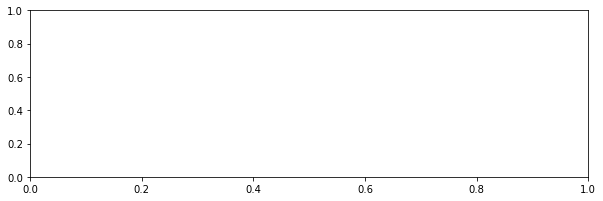

In [8]:
%matplotlib inline

trimmed_cwm_fwd = create_modisco_logos(modisco_h5py, modisco_logo_dir, 1)

array = trimmed_cwm_fwd

fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)

df = pandas.DataFrame(array, columns=["A", "C", "G", "T"])
df.index.name = "pos"

crp_logo = logomaker.Logo(df, ax=ax)
crp_logo.style_spines(visible=False)
plt.ylim(min(df.sum(axis=1).min(), 0), df.sum(axis=1).max())

plt.show()